### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from dython.nominal import associations
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
import warnings
import pickle
from sklearn.dummy import DummyClassifier
from collections import Counter
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import TweedieRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import multiprocessing
import lightgbm as lgbm
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA


from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [2]:
#with open('train.pickle', 'wb') as f:
    #pickle.dump([X_train, y_train, X_test, y_test], f)

In [3]:
with open('train_scaled.pickle', 'rb') as f:
    X_train_scaled, y_train, X_test_scaled, y_test = pickle.load(f)

In [41]:
X_train_scaled

,V_YEAR,C_YEAR,P_AGE,C_WTHR_2,C_WTHR_3,C_WTHR_4,C_WTHR_5,C_WTHR_6,C_WTHR_7,C_WTHR_52,C_WTHR_55,C_RSUR_2,C_RSUR_3,C_RSUR_4,C_RSUR_5,C_RSUR_6,C_RSUR_7,C_RSUR_8,C_RSUR_9,C_RSUR_52,C_RSUR_55,C_RALN_2,C_RALN_3,C_RALN_4,C_RALN_5,C_RALN_6,C_RALN_52,C_RALN_55,P_SEX_1,P_SEX_8,P_SEX_9,P_SAFE_2,P_SAFE_9,P_SAFE_10,P_SAFE_11,P_SAFE_12,P_SAFE_13,P_SAFE_50,P_SAFE_54,P_SAFE_56,C_WDAY_2,C_WDAY_3,C_WDAY_4,C_WDAY_5,C_WDAY_6,C_WDAY_7,C_WDAY_52,V_TYPE,C_HOUR,C_TRAF,C_RCFG,C_MNTH
0,-0.125761,-0.658144,-0.909733,-0.287946,-0.279274,-0.231739,-0.058381,8.200362,-0.04079,-0.090976,-0.037272,-0.394510,-0.193403,-0.09257,-0.215033,-0.051435,-0.024145,-0.010206,-0.005292,-0.08641,-0.149267,-0.284821,-0.262019,-0.197307,-0.064593,-0.058724,-0.21491,-0.054135,1.647491,-0.160286,-0.036334,0.789097,-0.152853,-0.003131,-0.000868,-0.045865,-0.122477,-0.296252,-0.269572,-0.074415,-0.342773,-0.343708,-0.364415,-0.403317,2.619337,-0.340777,-0.010751,-0.349689,-0.668891,-1.041833,-0.303883,0.970169
1,-0.301250,-1.340419,-1.402359,-0.287946,-0.279274,-0.231739,-0.058381,-0.121946,-0.04079,-0.090976,-0.037272,-0.394510,-0.193403,-0.09257,-0.215033,-0.051435,-0.024145,-0.010206,-0.005292,-0.08641,-0.149267,-0.284821,-0.262019,-0.197307,-0.064593,-0.058724,-0.21491,-0.054135,1.647491,-0.160286,-0.036334,0.789097,-0.152853,-0.003131,-0.000868,-0.045865,-0.122477,-0.296252,-0.269572,-0.074415,-0.342773,-0.343708,2.744121,-0.403317,-0.381776,-0.340777,-0.010751,-0.349689,-0.814225,0.294209,-0.237787,0.087381
2,-0.582032,-1.340419,-0.276357,-0.287946,-0.279274,-0.231739,-0.058381,-0.121946,-0.04079,-0.090976,-0.037272,-0.394510,-0.193403,-0.09257,-0.215033,-0.051435,-0.024145,-0.010206,-0.005292,-0.08641,-0.149267,-0.284821,-0.262019,-0.197307,-0.064593,-0.058724,-0.21491,-0.054135,1.647491,-0.160286,-0.036334,0.789097,-0.152853,-0.003131,-0.000868,-0.045865,-0.122477,-0.296252,-0.269572,-0.074415,-0.342773,-0.343708,-0.364415,-0.403317,-0.381776,2.934470,-0.010751,-0.349689,-0.232890,0.294209,-0.237787,0.381644
3,-0.301250,0.706404,-0.417107,-0.287946,-0.279274,-0.231739,-0.058381,-0.121946,-0.04079,-0.090976,-0.037272,-0.394510,-0.193403,-0.09257,-0.215033,-0.051435,-0.024145,-0.010206,-0.005292,-0.08641,-0.149267,-0.284821,-0.262019,-0.197307,-0.064593,-0.058724,-0.21491,-0.054135,-0.606984,-0.160286,-0.036334,-1.267272,-0.152853,-0.003131,-0.000868,-0.045865,-0.122477,-0.296252,3.709583,-0.074415,-0.342773,-0.343708,-0.364415,2.479442,-0.381776,-0.340777,-0.010751,-0.349689,0.348445,0.294209,-0.369980,0.087381
4,-0.301250,1.161253,-1.296797,-0.287946,-0.279274,-0.231739,-0.058381,-0.121946,-0.04079,-0.090976,-0.037272,-0.394510,-0.193403,-0.09257,-0.215033,-0.051435,-0.024145,-0.010206,-0.005292,-0.08641,-0.149267,-0.284821,-0.262019,-0.197307,-0.064593,-0.058724,-0.21491,-0.054135,-0.606984,-0.160286,-0.036334,0.789097,-0.152853,-0.003131,-0.000868,-0.045865,-0.122477,-0.296252,-0.269572,-0.074415,-0.342773,-0.343708,-0.364415,2.479442,-0.381776,-0.340777,-0.010751,-0.349689,-0.523558,0.294209,-0.369980,0.087381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9285127,-0.494715,1.182512,-0.225717,3.472869,-0.279274,-0.231739,-0.058381,-0.121946,-0.04079,-0.090976,-0.037272,-0.394510,-0.193403,-0.09257,4.650456,-0.051435,-0.024145,-0.010206,-0.005292,-0.08641,-0.149267,-0.284821,-0.262019,-0.197307,-0.064593,-0.058724,-0.21491,-0.054135,-0.606984,-0.160286,-0.036334,0.789097,-0.152853,-0.003131,-0.000868,-0.045865,-0.122477,-0.296252,-0.269572,-0.074415,-0.342773,-0.343708,-0.364415,2.479442,-0.381776,-0.340777,-0.010751,-0.349689,-0.523558,0.294209,-0.369980,-1.678197
9285128,-0.364749,0.082633,0.792699,-0.287946,-0.279274,-0.231739,-0.058381,-0.121946,-0.04079,-0.090976,-0.037272,-0.394510,-0.193403,-0.09257,-0.215033,-0.051435,-0.024145,-0.010206,-0.005292,-0.08641,-0.149267,-0.284821,-0.262019,-0.197307,

### Reducción de la dimensionalidad
Tenemos problemas para la ejecución de algunos modelos debido al tamaño del dataset. Como ejemplo, nuestro ordenador no es capaz de ejecutar un RandomForestClassier y por lo tanto procederemos a reducir la dimensionalidad de nuestras variables:

### Regularización Ridge

In [5]:
sel_ridge = SelectFromModel(LogisticRegression(C=1, penalty='l2'), threshold = 0.09)
sel_ridge.fit(X_train_scaled, y_train)

SelectFromModel(estimator=LogisticRegression(C=1), threshold=0.09)

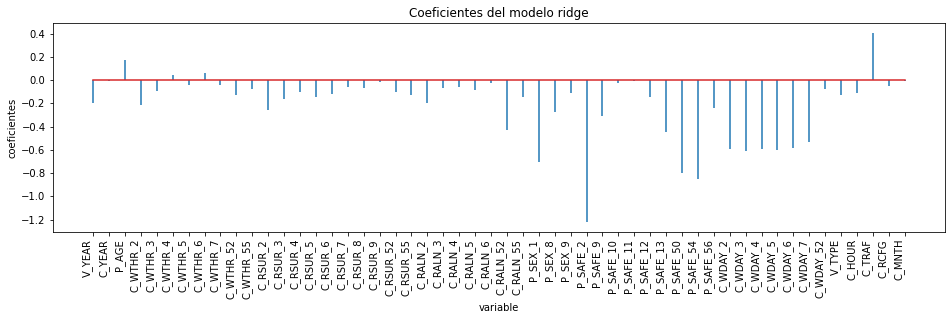

In [6]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train_scaled.columns,
                         'coef': sel_ridge.estimator_.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(16, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo ridge');

In [7]:
sel_ridge.get_support()
selected_feat = X_train_scaled.columns[sel_ridge.get_support()]
selected_feat

Index(['V_YEAR', 'P_AGE', 'C_WTHR_2', 'C_WTHR_3', 'C_WTHR_52', 'C_RSUR_2',
       'C_RSUR_3', 'C_RSUR_4', 'C_RSUR_5', 'C_RSUR_6', 'C_RSUR_52',
       'C_RSUR_55', 'C_RALN_2', 'C_RALN_52', 'C_RALN_55', 'P_SEX_1', 'P_SEX_8',
       'P_SEX_9', 'P_SAFE_2', 'P_SAFE_9', 'P_SAFE_12', 'P_SAFE_13',
       'P_SAFE_50', 'P_SAFE_54', 'P_SAFE_56', 'C_WDAY_2', 'C_WDAY_3',
       'C_WDAY_4', 'C_WDAY_5', 'C_WDAY_6', 'C_WDAY_7', 'V_TYPE', 'C_HOUR',
       'C_TRAF'],
      dtype='object')

In [8]:
print('total features: {}'.format((X_train_scaled.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 52
selected features: 34


### PCA

In [9]:
pca = PCA()#primero lo hago sin fijar el número de componentes para visualizar la varianza

pca.fit(X_train_scaled[selected_feat])
X_train_pca = pca.transform(X_train_scaled[selected_feat])
X_test_pca = pca.transform(X_test_scaled[selected_feat])

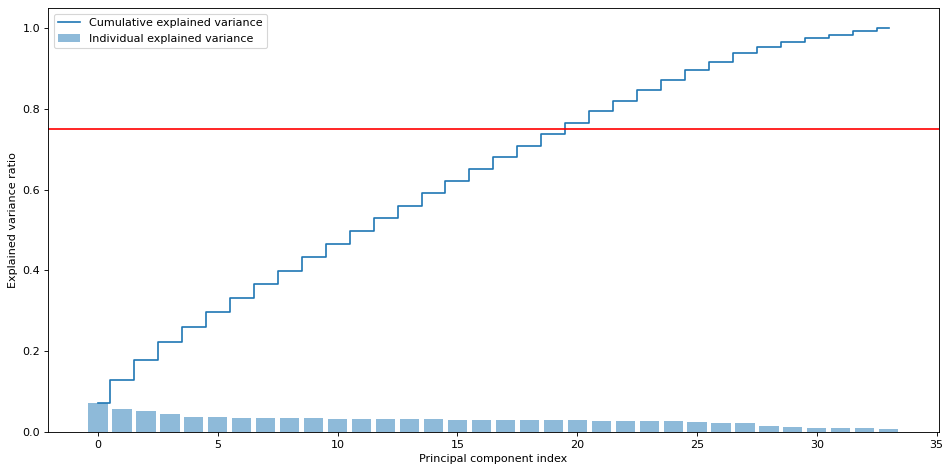

In [10]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

threshold = 0.75
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.axhline(y=threshold, color='r', linestyle='-')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Selecciono los 22 primeras componentes

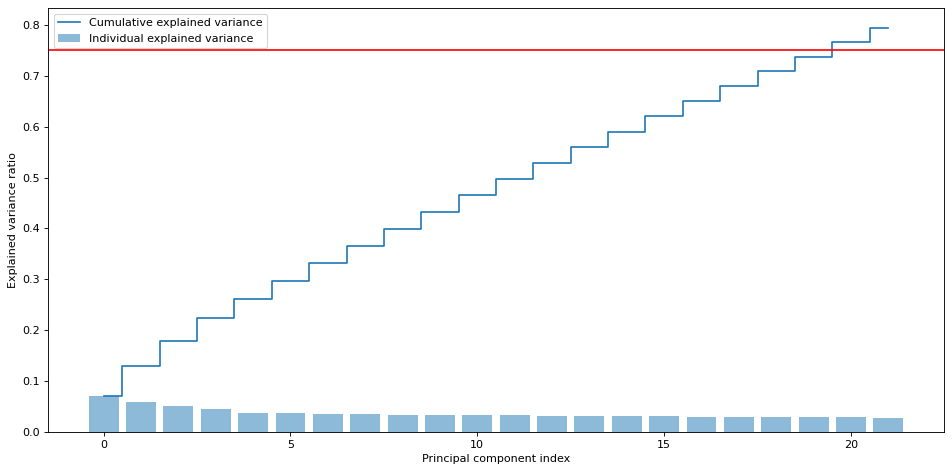

In [13]:
pca = PCA(n_components=22)

pca.fit(X_train_scaled[selected_feat])
X_train_pca = pca.transform(X_train_scaled[selected_feat])
X_test_pca = pca.transform(X_test_scaled[selected_feat])

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

threshold = 0.75
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.axhline(y=threshold, color='r', linestyle='-')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [14]:
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)
X_train_pca.columns = ['PCA_'+str(i) for i in X_train_pca.columns]
X_test_pca.columns = ['PCA_'+str(i) for i in X_test_pca.columns]
X_train_pca.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21
0,-1.418461,-0.103363,-0.310971,0.523786,0.121680,-0.357115,0.516548,-0.961330,2.133620,-0.957246,-0.135566,-1.322047,0.175066,-0.090419,0.181638,-0.021929,0.390982,-0.129142,-0.727877,-0.045002,0.126300,0.173256
1,-1.496938,0.184935,-0.326047,0.759029,-0.696370,0.057265,0.058522,-0.763364,-1.664448,-1.989867,-0.105575,-0.100634,0.274944,0.376799,-0.065023,0.238609,0.252704,0.179661,0.036635,0.153736,-0.429239,0.131305
2,-1.311679,0.171927,-0.469807,0.304644,0.298230,0.213676,0.072580,-0.514206,-1.298302,1.591873,0.003635,-2.012036,-0.033981,0.303714,0.447396,-0.334053,-0.023695,-0.086389,-0.836225,-0.441725,0.504067,0.231944
3,1.314162,-0.283176,-0.384145,0.021967,0.131000,1.278944,0.406888,3.065274,0.149027,0.038778,-0.077215,0.348054,0.479132,-0.541079,0.049625,0.465585,0.335544,-0.093013,-0.327693,0.634359,-0.266702,0.642786
4,-1.148720,0.117719,-0.553211,0.347959,0.258893,0.064324,-0.812116,2.361186,0.276760,-0.025697,-0.131358,-0.013647,-0.282287,0.318890,-0.498961,0.205394,0.414193,0.359442,0.181317,0.191055,-0.670009,-0.060726


In [15]:
with open('train_pca.pickle', 'wb') as f:
    pickle.dump([X_train_pca, y_train, X_test_pca, y_test], f)

### Modelos

In [16]:
"""  xgb.XGBClassifier(),
    lgbm.LGBMClassifier(),
    GaussianNB(),"""

'  xgb.XGBClassifier(),\n    lgbm.LGBMClassifier(),\n    GaussianNB(),'

In [17]:
"""rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
print(rfc)
print("model score: %.3f" % rfc.score(X_test_scaled, y_test))
"""

'rfc = RandomForestClassifier()\nrfc.fit(X_train_scaled, y_train)\nprint(rfc)\nprint("model score: %.3f" % rfc.score(X_test_scaled, y_test))\n'

In [29]:
print('hola')

hola


In [20]:
rfc = RandomForestClassifier(n_estimators = 10, max_depth=2)
rfc.fit(X_train_pca, y_train)
print(rfc)
print("model score: %.3f" % rfc.score(X_test_pca, y_test))

RandomForestClassifier(max_depth=2, n_estimators=10)
model score: 0.678


In [23]:
rfc = RandomForestClassifier(n_estimators = 10, max_depth=5)
rfc.fit(X_train_pca, y_train)
print(rfc)
print("model score: %.3f" % rfc.score(X_test_pca, y_test))

RandomForestClassifier(max_depth=5, n_estimators=10)
model score: 0.737


In [30]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth=2)
rfc.fit(X_train_pca, y_train)
print(rfc)
print("model score: %.3f" % rfc.score(X_test_pca, y_test))

RandomForestClassifier(max_depth=2)
model score: 0.706


In [31]:
classifiers = [
    DummyClassifier(strategy='constant', constant =1),
    Lasso(),
    LogisticRegression()
]

In [32]:
for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)]) 
    pipe.fit(X_train_pca, y_train)
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test_pca, y_test))


DummyClassifier(constant=1, strategy='constant')
model score: 0.010
Lasso()
model score: -24.868
LogisticRegression()
model score: 0.674


In [33]:
"""classifiers = [
    DummyClassifier(strategy='constant', constant =1),
    Lasso(),
    LogisticRegression(), 
    RandomForestClassifier(),
    xgb.XGBClassifier(),
    lgbm.LGBMClassifier(),
    GaussianNB(),
]"""

"classifiers = [\n    DummyClassifier(strategy='constant', constant =1),\n    Lasso(),\n    LogisticRegression(), \n    RandomForestClassifier(),\n    xgb.XGBClassifier(),\n    lgbm.LGBMClassifier(),\n    GaussianNB(),\n    GradientBoostingClassifier()\n]"

In [34]:
xgbc = xgb.XGBClassifier(max_depth = 3, min_child_weight = 1, gamma = 0, subsample=0.5, colsample_bytree = 0.5, n_estimators=100,objective= 'binary:logistic')
xgbc.fit(X_train_pca, y_train)
print(xgbc)
print("model score: %.3f" % xgbc.score(X_test_pca, y_test))

[15:14:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='approx', validate_parameters=1,
              verbosity=None)
model score: 0.801


In [38]:
xgbc2 = xgb.XGBClassifier(max_depth = 3, min_child_weight = 1, gamma = 0, subsample=0.5, colsample_bytree = 0.5, n_estimators=100,objective= 'binary:logistic')
xgbc2.fit(X_train_scaled, y_train)
print(xgbc2)
print("model score: %.3f" % xgbc2.score(X_test_scaled, y_test))

[15:38:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='approx', validate_parameters=1,
              verbosity=None)
model score: 0.940


In [36]:
import lightgbm as lgb
lgbc = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgbc.fit(X_train_pca, y_train)
print(lgbc)
print("model score: %.3f" % lgbc.score(X_test_pca, y_test))

LGBMClassifier(silent=True)
model score: 0.811


In [39]:
import lightgbm as lgb
lgbc2 = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgbc2.fit(X_train_scaled, y_train)
print(lgbc2)
print("model score: %.3f" % lgbc2.score(X_test_scaled, y_test))

LGBMClassifier(silent=True)
model score: 0.987


In [37]:
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
print(gnb)
print("model score: %.3f" % gnb.score(X_test_pca, y_test))

GaussianNB()
model score: 0.461


In [40]:
gnb2 = GaussianNB()
gnb2.fit(X_train_scaled, y_train)
print(gnb2)
print("model score: %.3f" % gnb2.score(X_test_scaled, y_test))

GaussianNB()
model score: 0.160
